# Tutorial: Supervised Learning Problem and Least Squares

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F02_tutorial_supervised_learning_problem_ols.ipynb)

Tutorial to the classes [Supervised Learning Problem and Least Squares](02_supervised_learning_problem.ipynb) and [Ordinary Least Squares](03_ordinary_least_squares.ipynb).

<div class="alert alert-block alert-info">
    <b>Tutorial Objectives</b>
    
- Read, plot and analyze train data
- Use supervised learning to predict the regional electricity consumption of France in response electric heating based on temperature data
- Test the linear least squares (OLS) model
- Evaluate their performance by estimating their Expected Prediction Errors (EPE) using test data
</div>

## Dataset presentation

- Input:
  - 2m-temperature
    - Domain: Metropolitan France
    - Spatial resolution: regional average
    - Time resolution: hourly
    - Period: 2014-2021
    - Units: °C
    - Source: [MERRA-2 reanalysis](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/)
- Target:
  - Electricity demand
    - Domain: Metropolitan France
    - Spatial resolution: regional sum
    - Time resolution: hourly
    - Period: 2014-2021
    - Units: MWh
    - Source: [RTE](https://opendata.reseaux-energies.fr/)

## Reading and pre-analysis of the input and output data

### Import data-analysis and plot modules and define paths

In [6]:
# Path manipulation module
from pathlib import Path
# Numerical analysis module
import numpy as np
# Formatted numerical analysis module
import pandas as pd
# Plot module
import matplotlib.pyplot as plt
# Default colors
RC_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Matplotlib configuration
plt.rc('font', size=14)

In [7]:
# Set data directory
data_dir = Path('data')

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict()

# Set first and last years
FIRST_YEAR = 2014
LAST_YEAR = 2021

# Define temperature filepath
temp_filename = 'surface_temperature_merra2_{}-{}.csv'.format(
    FIRST_YEAR, LAST_YEAR)
temp_filepath = Path(data_dir, temp_filename) #path = Path(directory, filename)
temp_label = 'Temperature (°C)'

# Define electricity demand filepath
dem_filename = 'reseaux_energies_demand_demand.csv'
dem_filepath = Path(data_dir, dem_filename)
dem_label = 'Electricity consumption (MWh)'

### Reading and plotting the raw temperature data

> ***Question (code cells below)***
> - Use `pd.read_csv` with the filepath and appropriate options to make sure to get the column names and the index as dates (`DatetimeIndex`).
> - Use the `resample` method from the data frame to compute daily means.
> - Plot the `'Île-de-France'` daily-mean temperature time series for (a) the whole period, (b) one year, (c) one month in winter and (d) one month in summer on 4 different figures (use `plt.figure`) using `plt.plot` or the `plot` method from data frames (preferably).
> - Use the `mean` and `var` methods to get mean and variance of the daily-mean temperature.

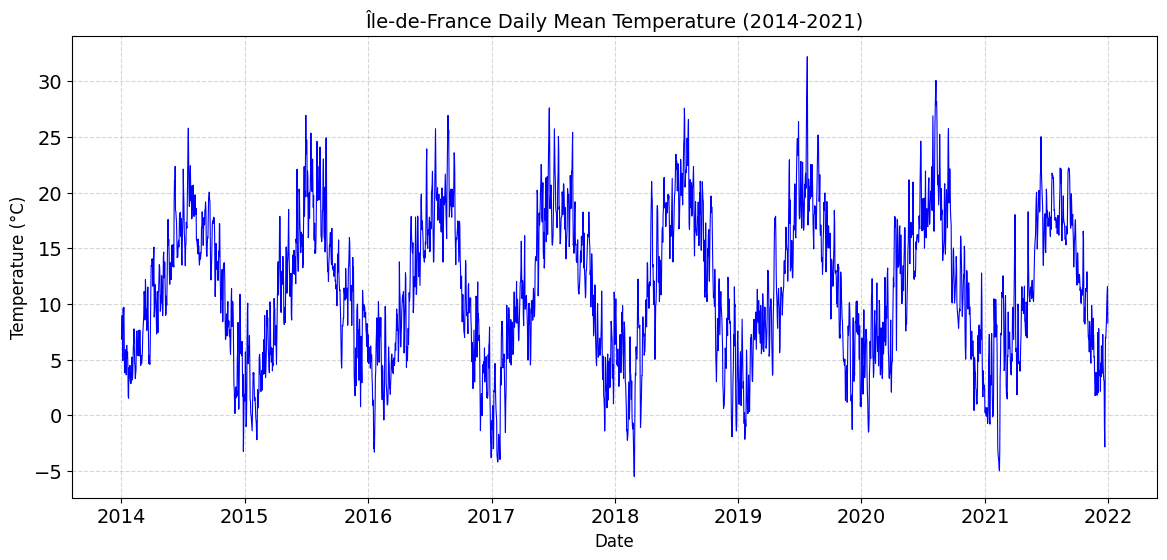

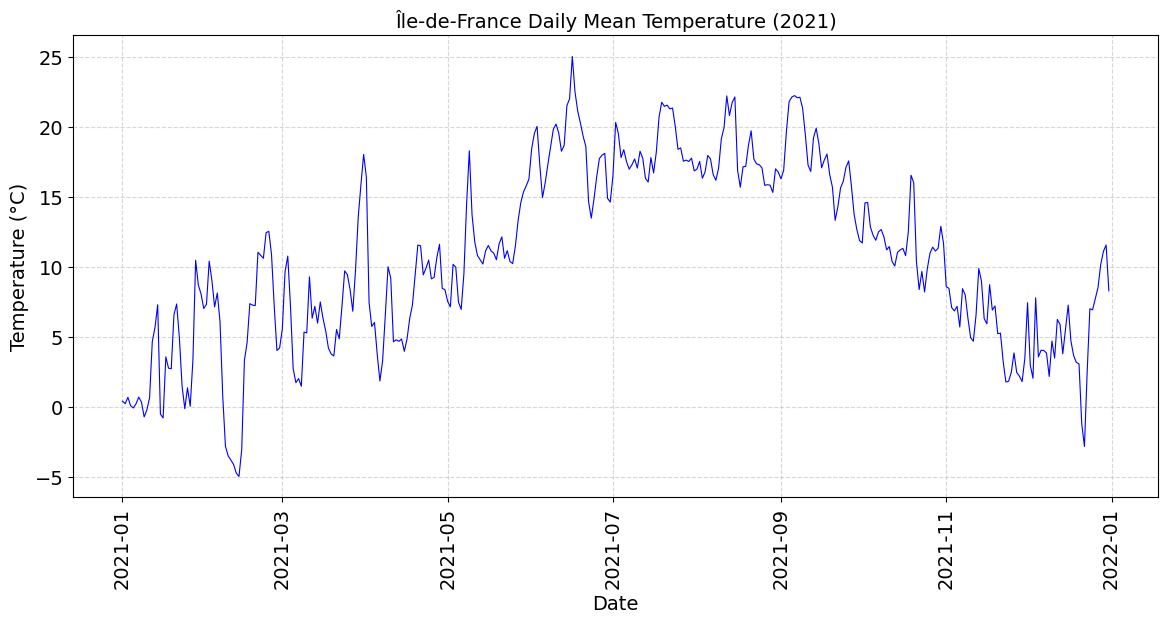

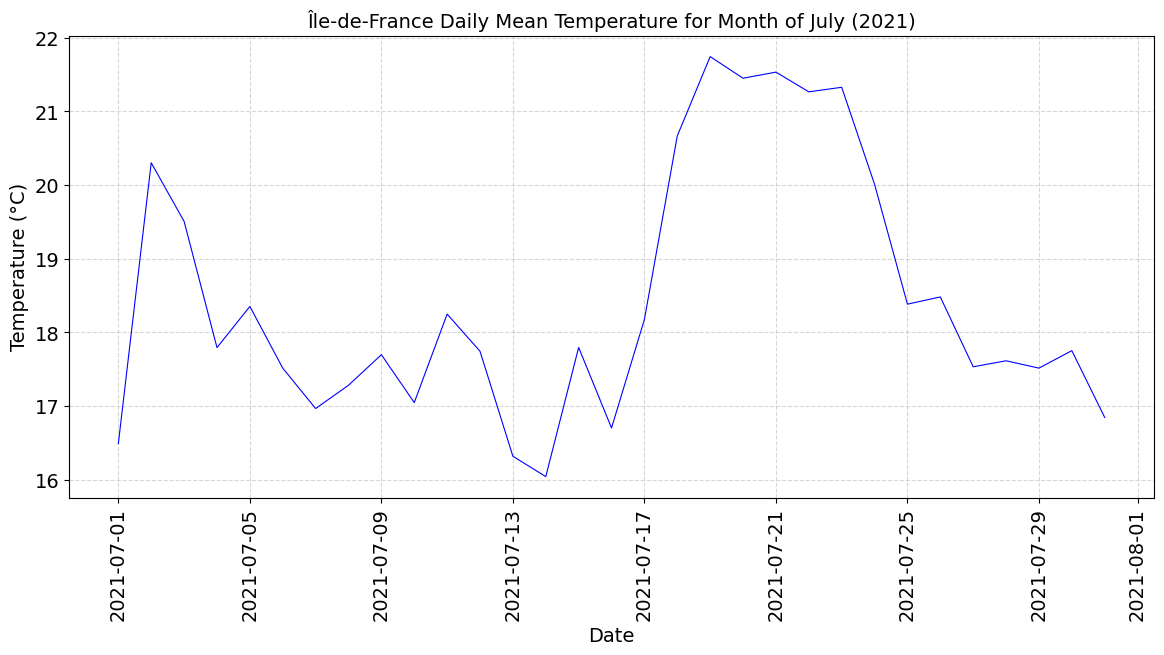

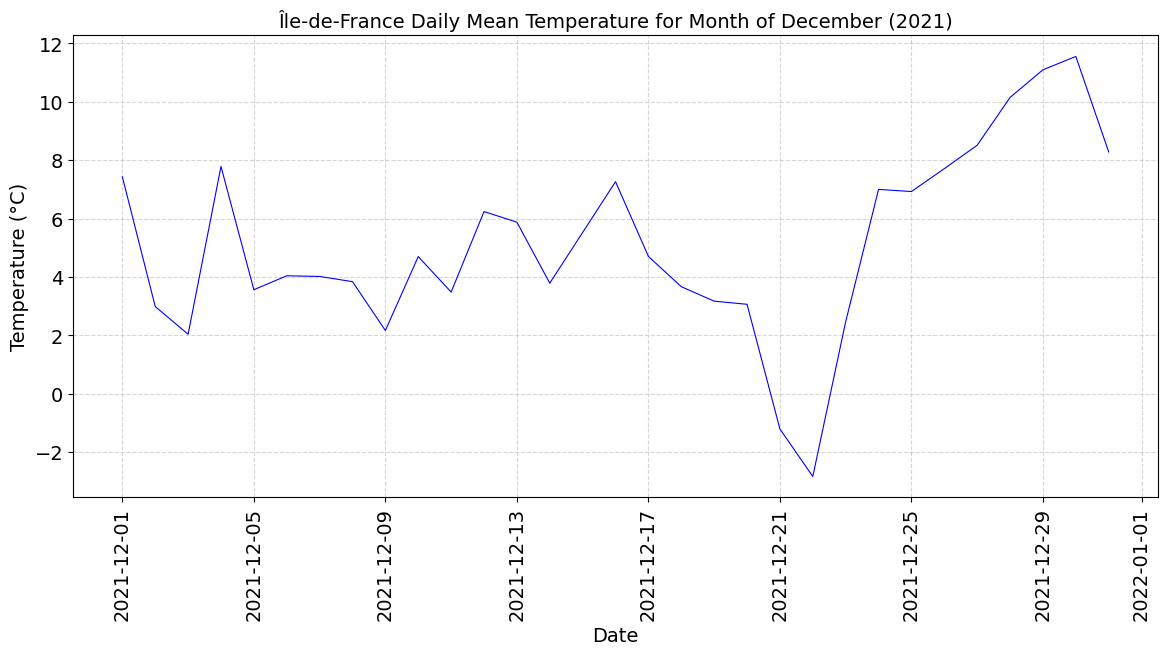

mean_daily_mean: 
 Grand Est                     10.583280
Nouvelle-Aquitaine            12.850292
Auvergne-Rhône-Alpes          10.205010
Bourgogne-Franche-Comté       10.966754
Bretagne                      11.999812
Centre-Val de Loire           11.944525
Île-de-France                 11.322041
Occitanie                     12.571739
Hauts-de-France               10.763679
Normandie                     11.072006
Pays de la Loire              12.241871
Provence-Alpes-Côte d'Azur    12.114942
dtype: float64 

var_daily_mean: 
 Grand Est                     51.082903
Nouvelle-Aquitaine            39.307651
Auvergne-Rhône-Alpes          50.295255
Bourgogne-Franche-Comté       50.052776
Bretagne                      22.246660
Centre-Val de Loire           44.631593
Île-de-France                 42.328373
Occitanie                     43.681380
Hauts-de-France               35.380391
Normandie                     31.236250
Pays de la Loire              33.314120
Provence-Alpes-Côte d'Azur

In [94]:
# answer cell
#df_data = pd.read_csv('data/surface_temperature_merra2_2014-2021.csv')
#df_data = df_data.set_index('time') # If i dont do that my indexes and Time column are different (Set the DataFrame index (row labels) using one or more existing columns or arrays), also I need it for resample method

df_data = pd.read_csv('data/surface_temperature_merra2_2014-2021.csv',
                     parse_dates=['time'], #sets the time column as datetime
                     index_col='time' #set the 'time' column as the index
                     )

#visualizing the data
#df_data.head()

#resampling the data
df_mean_daily = df_data.resample('D').mean()

#plotting for the whole period
plt.figure(figsize=(14, 6))
plt.plot(df_mean_daily['Île-de-France'],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Mean Temperature (2014-2021)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#plottting for 1 year
year = 2021
#df_mean_daily['Île-de-France'].loc[str(year)]  # getting the column for 2021 ile de france
plt.figure(figsize=(14, 6))
plt.plot(df_mean_daily['Île-de-France'].loc[str(year)],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Mean Temperature (2021)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#plotting for 1 Summer month
summer_month = '2021-07'
#df_daily['Île-de-France'].loc['2021-07'] this gets me the data of only Mean Daily of the summer months.
plt.figure(figsize=(14, 6))
plt.plot(df_mean_daily['Île-de-France'].loc[summer_month],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Mean Temperature for Month of July (2021)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#plotting for 1 Winter month
winter_month = '2021-12'
#df_daily['Île-de-France'].loc['2021-07'] this gets me the data of only Mean Daily of the summer months.
plt.figure(figsize=(14, 6))
plt.plot(df_mean_daily['Île-de-France'].loc[winter_month],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Mean Temperature for Month of December (2021)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#calculating the mean and var
print("mean_daily_mean:","\n",df_mean_daily.mean(),"\n")

print("var_daily_mean:","\n",df_mean_daily.var())


### Reading and plotting the demand data

> ***Question***
> - Same question for the demand but with daily sums instead of daily means

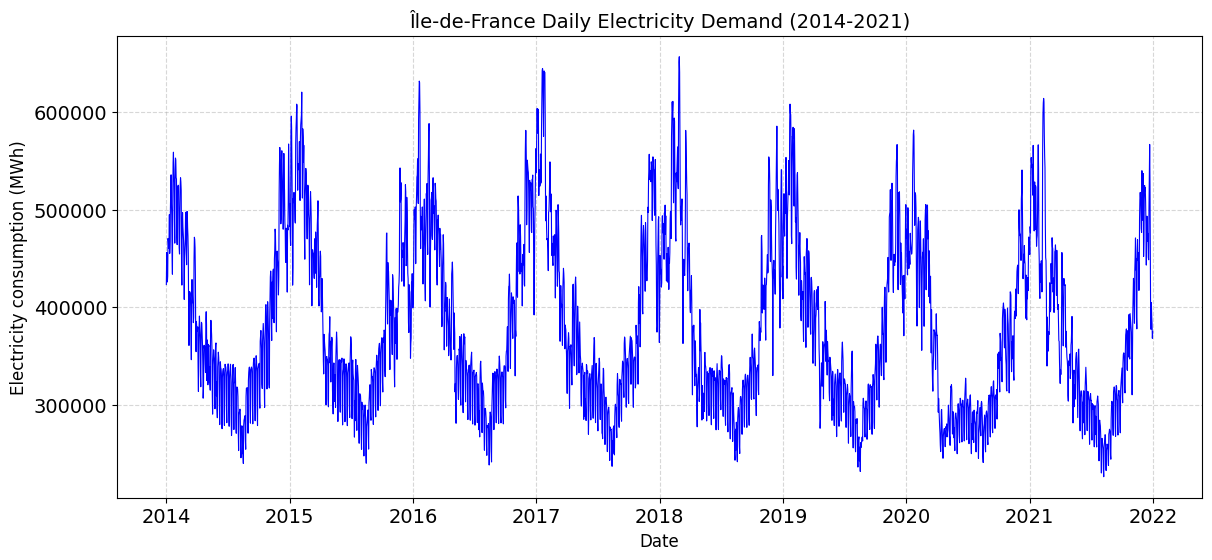

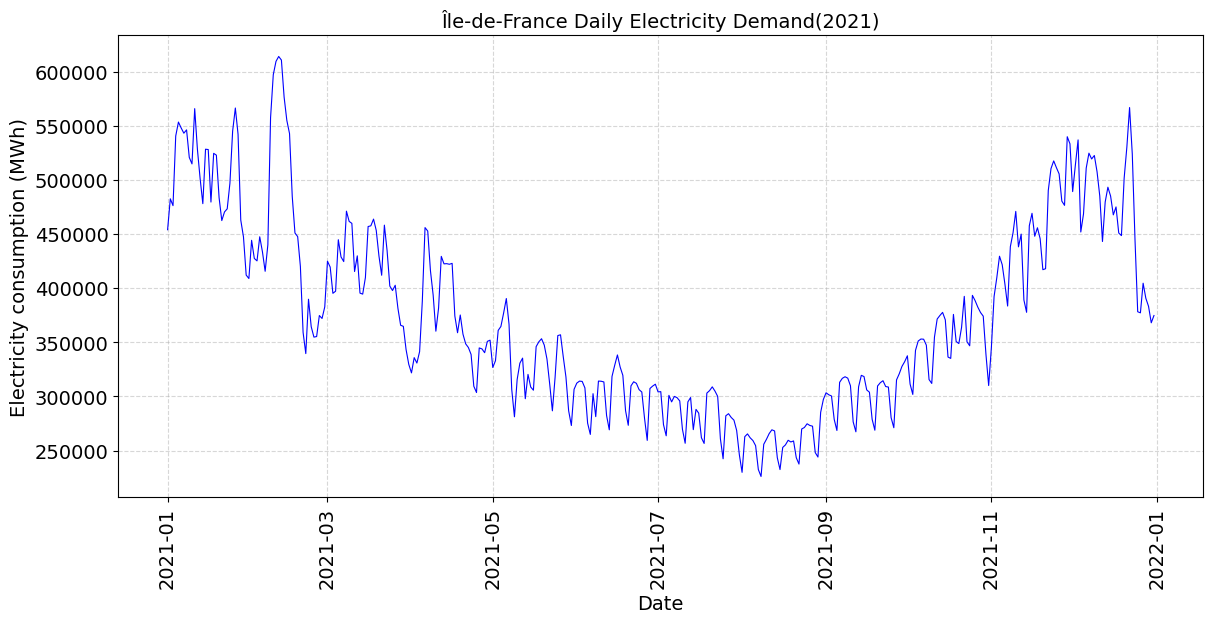

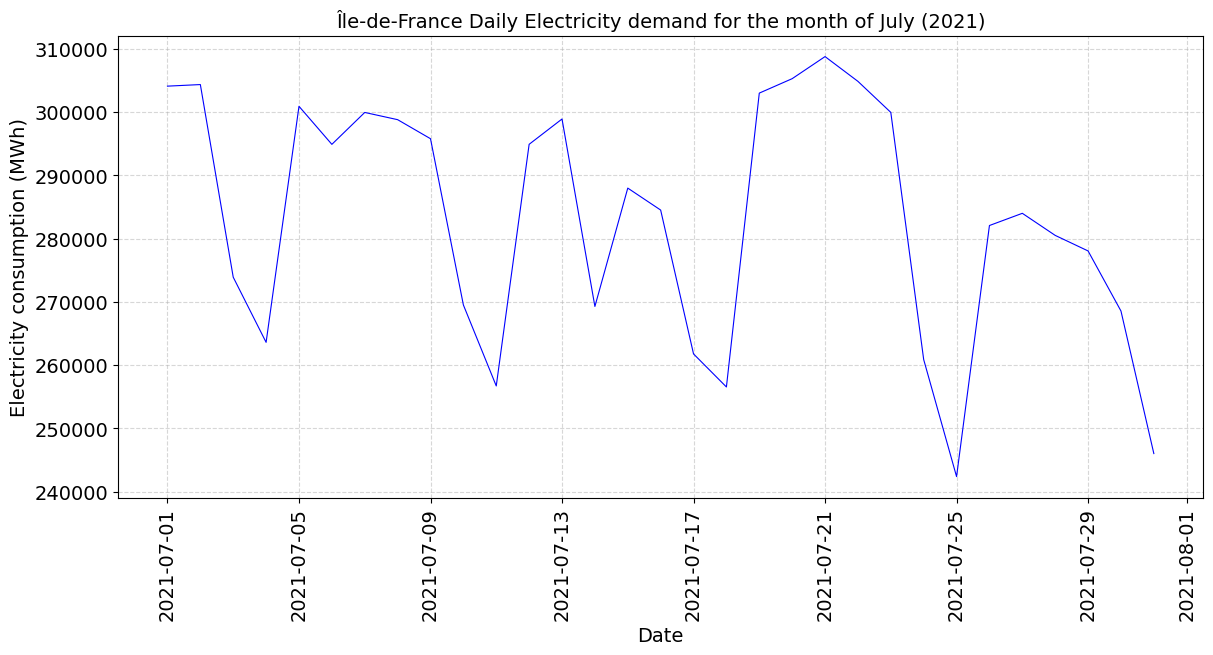

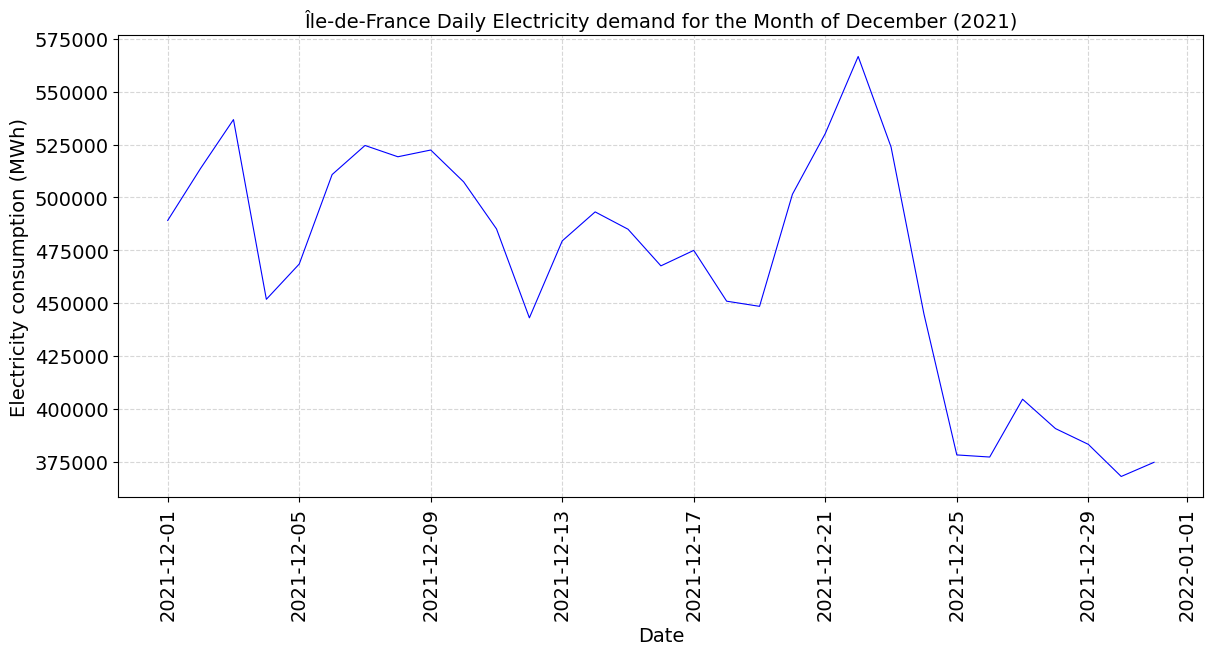

In [99]:
# answer cell
df_demand = pd.read_csv('data/reseaux_energies_demand_demand.csv',
                     parse_dates=['time'], #sets the time column as datetime
                     index_col='time' #set the 'time' column as the index
                     )
#df_demand.head()

#resampling the data
df_daily_demand = df_demand.resample('D').sum()

#plotting for the whole period
plt.figure(figsize=(14, 6))
plt.plot(df_daily_demand['Île-de-France'],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Electricity Demand (2014-2021)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Electricity consumption (MWh)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#plottting for 1 year
year = 2021
#df_mean_daily['Île-de-France'].loc[str(year)]  # getting the column for 2021 ile de france
plt.figure(figsize=(14, 6))
plt.plot(df_daily_demand['Île-de-France'].loc[str(year)],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Electricity Demand(2021)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Electricity consumption (MWh)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#plotting for 1 Summer month
summer_month = '2021-07'
#df_daily_demand['Île-de-France'].loc['2021-07'] this gets me the data of only Mean Daily of the summer months.
plt.figure(figsize=(14, 6))
plt.plot(df_daily_demand['Île-de-France'].loc[summer_month],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Electricity demand for the Month of July (2021)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Electricity consumption (MWh)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#plotting for 1 Winter month
winter_month = '2021-12'
#df_daily_demand['Île-de-France'].loc['2021-07'] this gets me the data of only Mean Daily of the summer months.
plt.figure(figsize=(14, 6))
plt.plot(df_daily_demand['Île-de-France'].loc[winter_month],color='blue', linewidth=0.8)
plt.title('Île-de-France Daily Electricity demand for the Month of December (2021)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Electricity consumption (MWh)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#calculating the mean and var
print("mean_daily_mean:","\n",df_mean_daily.mean(),"\n")

print("var_daily_mean:","\n",df_mean_daily.var())



### Analyzing the input and target data and their relationships

> ***Question (write your answer in text box below)***
> - Describe the seasonality of the temperature in Île-de-France.
> - Are all years the same?
> - Describe the seasonal and weakly demand patterns.

Answer: Categorizing the year into 3 quarters, namely spring, summer and winter. In Summers the temperature is higher, while for spring and winter the temperature is lower, the trend is periodic and remains same for all the years. Whereas, for electrcity the seasonality is otherwise, higher consumption in winters while lower for other two quarters.

> ***Question***
> - Select the temperature and demand data for their largest common period using the `intersection` method of the `index` attribute of the data frames.
> - Represent a scatter plot of the daily demand versus the daily temperature using `plt.scatter`.

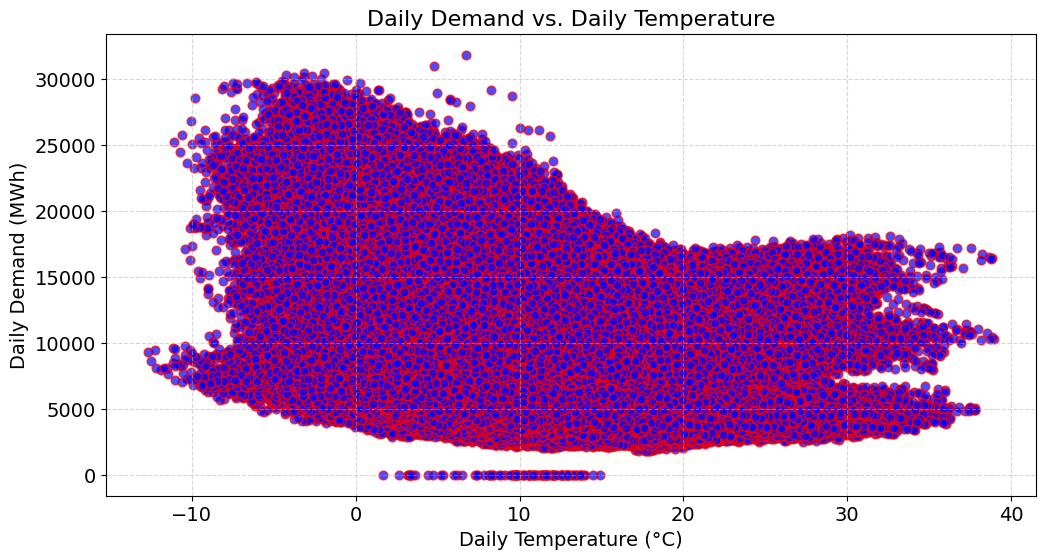

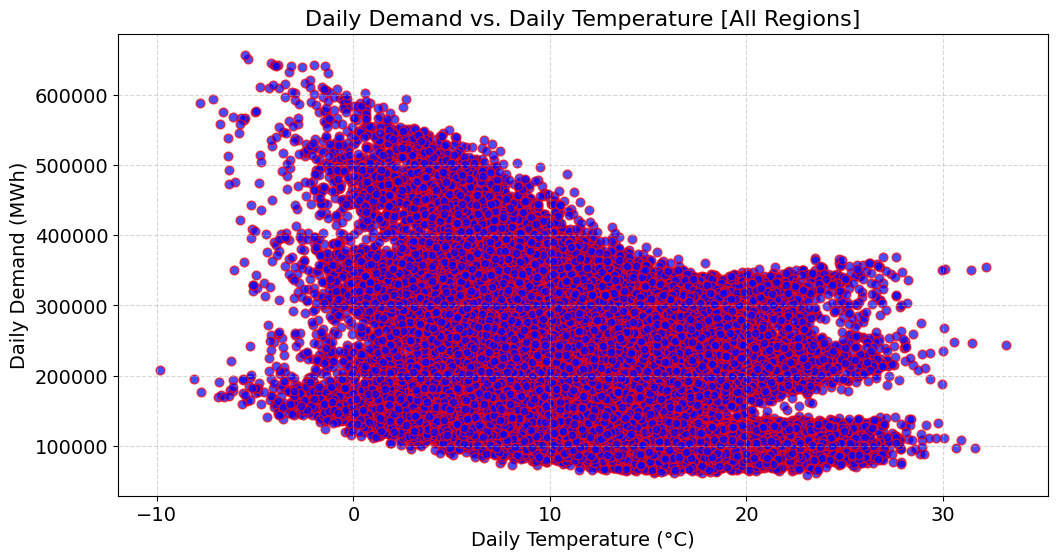

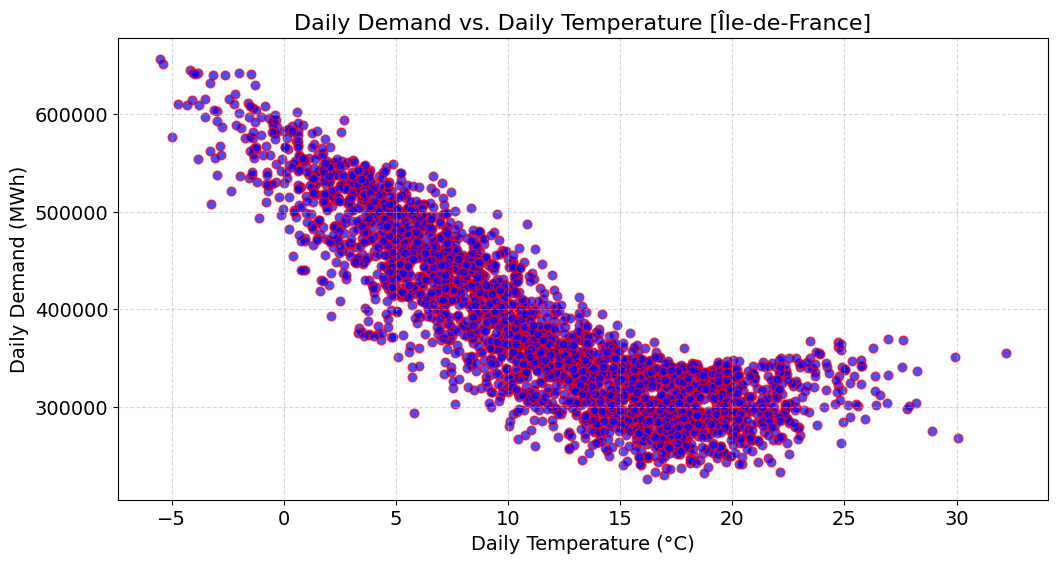

In [265]:
# answer cell
#df_data = temperature dataframe
#df_demand = Electricity demand dataframe.
common_period = df_data.index.intersection(df_demand.index) #very common to the concept of sets
#print(common_period)

filtered_temp_data = df_data.loc[common_period]
filtered_demand_data = df_demand.loc[common_period]
# I didnt understood much, as the common period is the entire duration between 2014-2021, so what does this add

#scatter plot on whole data 
plt.figure(figsize=(12, 6))
plt.scatter(filtered_temp_data,filtered_demand_data, alpha=0.7, color='blue', edgecolors='r', s=40)
plt.title('Daily Demand vs. Daily Temperature', fontsize=16)
plt.xlabel('Daily Temperature (°C)', fontsize=14)
plt.ylabel('Daily Demand (MWh)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show

#scatter plot on mean_daily_temp and daily_demand for all stations
plt.figure(figsize=(12, 6))
plt.scatter(df_mean_daily,df_daily_demand, alpha=0.7, color='blue', edgecolors='r', s=40)
plt.title('Daily Demand vs. Daily Temperature [All Regions]', fontsize=16)
plt.xlabel('Daily Temperature (°C)', fontsize=14)
plt.ylabel('Daily Demand (MWh)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


plt.figure(figsize=(12, 6))
plt.scatter(df_mean_daily['Île-de-France'],df_daily_demand['Île-de-France'], alpha=0.7, color='blue', edgecolors='r', s=40)
plt.title('Daily Demand vs. Daily Temperature [Île-de-France]', fontsize=16)
plt.xlabel('Daily Temperature (°C)', fontsize=14)
plt.ylabel('Daily Demand (MWh)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

> ***Question***
> - Compute the correlation between the daily temperature and the daily demand in Île-de-France using `np.corrcoef`.
> - Compute the correlation between the monthly temperature and the monthly demand using the `resample` method.
> - What do you think explains the difference between the daily and the monthly correlation?

In [175]:
# answer cell
#Daily correlation
print("daily correlation:", "\n" , np.corrcoef(df_mean_daily['Île-de-France'],df_daily_demand['Île-de-France']))

#Monthly correlation
df_mean_Monthly_temp = df_data.resample('ME').mean()
df_monthly_demand = df_demand.resample('ME').sum()
#df_mean_Monthly_temp
#df_monthly_demand
print("monthly correlation:",  "\n" , np.corrcoef(df_mean_Monthly_temp['Île-de-France'],df_monthly_demand['Île-de-France']))


daily correlation: 
 [[ 1.        -0.8601297]
 [-0.8601297  1.       ]]
monthly correlation: 
 [[ 1.         -0.94011428]
 [-0.94011428  1.        ]]


Answer: Correlation matrix from both the datasets explains that the two variables are strongly negataively, i.e one increases and the other decreases. The off-diagonal terms shows the correlation between the two variables, which for monthly dataset is more robust then for daily, which might be due to higher degree of local fluctuations when we aggregate at daily scale. 

## Ordinary Least Squares

> ***Question***
> - Perform an OLS with intercept using the entire dataset from the temperature using the formula for the optimal coefficients derived in [Supervised Learning Problem and Least Squares](2_supervised_learning_problem_ols.ipynb) (without Scikit-Learn). To do so:
>   - Prepare the input matrix and output vector with the `np.concatenate` function (for instance);
>   - Use the matrix-multiplication operator seen in [Introduction](1_introduction.ipynb) and the `np.linalg.inv` function to compute the optimal coefficients and print them.
> - Use the estimated coefficents to predict the target from the input train data.
> - Overlay your prediction to the scatter plot of the train data.
> - Compute the train Mean Squared Error (MSE) and the train coefficient of determination ($R^2$) and print them.

intercept Manual OLS: 
 [18723.5228736   6088.48483753  7033.89563312  5773.06738631
 12607.37143716 14256.91055105 20886.89685609  8443.59294681
 12757.88544623 10962.01878103  8314.68078488 11211.56266752]
Coefficient Manual OLS: 
 [[  93.47718267   10.79902232    8.35287368   26.92114414  -52.71721753
   -13.18580317   55.52937847   13.21099787   86.76819468   98.06995809
    36.74599253  103.96782331]
 [ -63.13935506   -9.48409797   19.86695109   -6.66343796    1.80454102
    21.19887728   89.94925336   21.80567587 -101.63676966  -73.89932958
     6.0633209   -81.55407903]
 [ 396.65102285  145.57700764  163.9798653   149.21142611  259.74791105
   254.84970904  526.52943925  164.53842862  363.5475907   350.21116036
   208.15709444  277.24648918]
 [-805.12653814 -268.50045715 -246.89311908 -244.54124208 -396.97650199
  -369.1105121  -905.48122591 -248.31733522 -609.64080131 -596.3870311
  -320.32555983 -549.38178524]
 [  15.09674143    1.60208315  -64.13555356    3.79600805  -20.0141

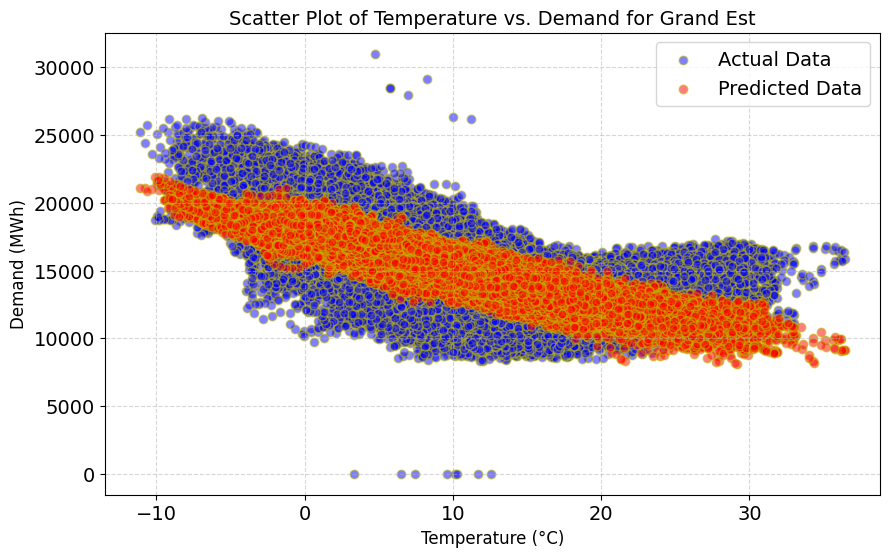

Mean Squared Error (MSE): 2575013.2987805787
Coefficient of Determination (R^2): 0.860383448746459


In [347]:
# answer cell

#for creating matrices
temperature = df_data.values
demand = df_demand.values 

#Preparing Input matrix and output vector
ones = np.ones((len(temperature),1)) # it creates a 1D array equal to number of rows of temperature and 1 column
X = np.concatenate((ones, temperature), axis=1) #Input Vector
y = demand #Output vector

#checking the size
#print(temperature.shape)
#print(ones.shape)
#print(X.shape) (70128, 13)
#print(y.shape) (70128, 12)

#computing the coefficients
X_transpose = X.T
#X_transpose.shape (13, 70128)
beta = np.linalg.inv(X_transpose @ X) @ (X_transpose @ y)
# beta.shape (13, 12)
beta
intercept = beta[0]  # The first column is the intercept for 12 locations
coefficient = beta[1:]    # The remaining 12 columns have the slope values for 12 locations
#intercept.shape (12,)
#slopes.shape (12, 12)
print("intercept Manual OLS:", "\n" , intercept)
print("Coefficient Manual OLS:", "\n" , coefficient)

# Predict the target from the input train data
y_pred = X @ beta
# y_pred == y checking whether there is a difference or not.
# print(y_pred.shape)

# Plot the scatter plot of the first temperature feature vs. demand
plt.figure(figsize=(10, 6))
region_number = 0
# df_data.columns[0] checking the column names
# 0:Grand Est, 1: Nouvelle-Aquitaine .... 12:Provence-Alpes-Côte d'Azur
plt.scatter(temperature[:, region_number], demand[:, region_number], color='blue', label='Actual Data', alpha=0.5, edgecolors='y', s=40)
plt.scatter(temperature[:, region_number], y_pred[:, region_number], color='red', label='Predicted Data', alpha=0.5, edgecolors='y', s=40)
plt.title('Scatter Plot of Temperature vs. Demand for {}'.format(df_data.columns[region_number]), fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Demand (MWh)', fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Compute the Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)

# Compute the coefficient of determination (R^2)
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2)   # Residual sum of squares
r_squared = 1 - (ss_residual / ss_total)
print("Coefficient of Determination (R^2):", r_squared)


> ***Question***
> - Compute the optimal coefficients using centered input temperatures.
> - Compute the optimal intercept alone using a single-column input matrix.
> - Compare the resulting two estimations of the intercept with the sample mean of the target train data.

In [291]:
# answer cell

### Compute Optimal coefficients using centered approach

# Center the temperature data
mean_temp = np.mean(temperature, axis=0)
# print(mean_temp.shape)  (12,)
centered_temp = temperature - mean_temp
#print(centered_temp.shape) (70128, 12)

#preparing input matrix with centered temperature data
ones = np.ones((len(temperature), 1))
#print(ones.shape) (70128, 1)
X_centered = np.concatenate((ones, centered_temp), axis=1)
# print(X_centered.shape) (70128, 13)

#compute the OLS coefficients for centered data
beta_centered = np.linalg.inv(X_centered.T @ X_centered) @ (X_centered.T @ demand)
intercept_centered, slopes_centered = beta_centered[0], beta_centered[1:]

### COMPUTE OPTIMAL INTERCEPT
X_intercept_only = np.ones((len(temperature), 1)) # we do not concatenate to form a input matrix rather this is our input matrix
beta_intercept_only = np.linalg.inv(X_intercept_only.T @ X_intercept_only) @ (X_intercept_only.T @ demand)
intercept_only = beta_intercept_only[0]

### Compare the Two Intercepts with the Sample Mean

# Compute the sample mean of the target (demand)
mean_demand = np.mean(demand, axis=0)

print("\nComparison of Intercepts:")
print("Intercept from Centered Input:","\n", intercept_centered)
print("Intercept from Single-Column Input:","\n", intercept_only)
print("Sample Mean of Demand:", mean_demand)

#checking
intercept_centered.all() == intercept_only.all() == mean_demand.all()


Comparison of Intercepts:
Intercept from Centered Input: 
 [14997.0894935   4843.82784337  5082.61585957  4273.60279774
 10323.42395334 11470.19287588 15970.6722707   6316.25785706
  9847.83833847  8522.53400924  6142.37391627  9288.88894593]
Intercept from Single-Column Input: 
 [14997.0894935   4843.82784337  5082.61585957  4273.60279774
 10323.42395334 11470.19287588 15970.6722707   6316.25785706
  9847.83833847  8522.53400924  6142.37391627  9288.88894593]
Sample Mean of Demand: [14997.0894935   4843.82784337  5082.61585957  4273.60279774
 10323.42395334 11470.19287588 15970.6722707   6316.25785706
  9847.83833847  8522.53400924  6142.37391627  9288.88894593]


True

> ***Question***
> - Perform an OLS fit with intercept using the entire dataset to predict the demand from the temperature using Scikit-learn. To do so:
>   - Import the `linear_model` module from `sklearn` (Scikit-Learn)
>   - Define a regressor using `linear_model.LinearRegression` (by default, the regressor is configured to fit an intercept in addition to the features, see `fit_intercept` option)
>   - Prepare the input matrix and output vector for the `fit` method of the regressor
>   - Apply the `fit` method to the input and output
> - Print the fitted coefficients using the `coef_` attribute of the regressor.
> - Compute the train $R^2$ coefficient using the `score` method of the regressor.
> - Compare the resulting coefficients and score to those obtained above by applying the formulas yourself.

In [336]:
# answer cell
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)  # if set to false, would not calculate the intercept

# Input matrix and output vector
X_scikit = df_data.values
Y_scikit = df_demand.values

regressor.fit(X_scikit, Y_scikit)

intercept_scikit = regressor.intercept_
coefficients_scikit = regressor.coef_

print("Intercept (using Scikit-Learn):","\n", intercept_scikit)
print("Coefficients (using Scikit-Learn):","\n", coefficients_scikit)

r_squared = regressor.score(X_scikit, Y_scikit)
print("R^2 Score (using Scikit-Learn):","\n",r_squared)

Intercept (using Scikit-Learn): 
 [18723.5228736   6088.48483754  7033.89563312  5773.06738631
 12607.37143716 14256.91055105 20886.89685609  8443.59294681
 12757.88544623 10962.01878103  8314.68078488 11211.56266752]
Coefficients (using Scikit-Learn): 
 [[  93.47718267  -63.13935506  396.65102285 -805.12653814   15.09674143
   264.50298397  288.55617039   39.26487114 -214.66462462  -31.68065419
    -9.75277973 -284.19646399]
 [  10.79902232   -9.48409797  145.57700764 -268.50045715    1.60208315
    71.35933509   98.12700233   11.24753916  -57.49337061  -22.14052825
     9.84586102  -95.63707589]
 [   8.35287368   19.86695109  163.9798653  -246.89311908  -64.13555356
    56.17702057  130.99793469   -2.99804577  -74.84732567  -29.33600899
   -11.60355843 -110.20713047]
 [  26.92114414   -6.66343796  149.21142611 -244.54124208    3.79600805
    56.37915489   86.3410725    11.24494999  -73.93803815  -18.89778409
   -14.524512    -98.60900432]
 [ -52.71721753    1.80454102  259.74791106 -

In [346]:
#Checking
Y_pred_scikit = X_scikit @ coefficients_scikit
print(X_scikit == temperature)
print("Difference in coefficients:","\n", coefficients_scikit-coefficient)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
Difference in coefficients: 
 [[-2.21589858e-10 -7.39383774e+01  3.88298149e+02 -8.32047682e+02
   6.78139590e+01  2.77688787e+02  2.33026792e+02  2.60538733e+01
  -3.01432819e+02 -1.29750612e+02 -4.64987723e+01 -3.88164287e+02]
 [ 7.39383774e+01  1.02211573e-10  1.25710057e+02 -2.61837019e+02
  -2.02457863e-01  5.01604578e+01  8.17774896e+00 -1.05581367e+01
   4.41433990e+01  5.17588013e+01  3.78254012e+00 -1.40829969e+01]
 [-3.88298149e+02 -1.25710057e+02 -1.72150294e-10 -3.96104545e+02
  -3.23883465e+02 -1.98672688e+02 -3.95531505e+02 -1.67536474e+02
  -4.38394916e+02 -3.79547169e+02 -2.19760653e+02 -3.87453620e+02]
 [ 8.32047682e+02  2.61837019e+02  3.96104545e+02 -2.17710294e-10
   4.00772510e+02  4.25489667e+02  9.918222

Answer: 

> ***Question***
> - Define and array of 100 temperatures ranging from -5 to 35°C with `np.linspace`.
> - Make a prediction of the demand for these temperatures using the trained OLS model with the `predict` method of the regressor.
> - Plot this prediction over the scatter plot of the train data.
> - Does the demand prediction seem satisfactory over the whole range of temperatures?

In [ ]:
# answer cell


Answer:

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>